In [45]:
import nwhy
import hypernetx as hnx
import os
import numpy as np
import csv

In [3]:
path = r'/mnt/c/pythonProjects/591-newyork-times/archive'

In [4]:
print(os.listdir(path))

['ArticlesApril2017.csv', 'ArticlesApril2018.csv', 'ArticlesFeb2017.csv', 'ArticlesFeb2018.csv', 'ArticlesJan2017.csv', 'ArticlesJan2018.csv', 'ArticlesMarch2017.csv', 'ArticlesMarch2018.csv', 'ArticlesMay2017.csv', 'CommentsApril2017.csv', 'CommentsApril2018.csv', 'CommentsFeb2017.csv', 'CommentsFeb2018.csv', 'CommentsJan2017.csv', 'CommentsJan2018.csv', 'CommentsMarch2017.csv', 'CommentsMarch2018.csv', 'CommentsMay2017.csv']


In [5]:
paths_articles = []
paths_comments = []

articles_file_path_jan = path + '/' +'ArticlesJan2018.csv'
paths_articles.append(articles_file_path_jan)
comments_file_path_jan = path + '/' + 'CommentsJan2018.csv'
paths_comments.append(comments_file_path_jan)

articles_file_path_feb = path + '/' +'ArticlesFeb2018.csv'
paths_articles.append(articles_file_path_feb)
comments_file_path_feb = path + '/' + 'CommentsFeb2018.csv'
paths_comments.append(comments_file_path_feb)


articles_file_path_march = path + '/' +'ArticlesMarch2018.csv'
paths_articles.append(articles_file_path_march)
comments_file_path_march = path + '/' + 'CommentsMarch2018.csv'
paths_comments.append(comments_file_path_march)

articles_file_path_april = path + '/' +'ArticlesApril2018.csv'
# paths_articles.append(articles_file_path_april)
comments_file_path_april = path + '/' + 'CommentsApril2018.csv'
# paths_comments.append(comments_file_path_april)

print(paths_articles)
print(paths_comments)

['/mnt/c/pythonProjects/591-newyork-times/archive/ArticlesJan2018.csv', '/mnt/c/pythonProjects/591-newyork-times/archive/ArticlesFeb2018.csv', '/mnt/c/pythonProjects/591-newyork-times/archive/ArticlesMarch2018.csv']
['/mnt/c/pythonProjects/591-newyork-times/archive/CommentsJan2018.csv', '/mnt/c/pythonProjects/591-newyork-times/archive/CommentsFeb2018.csv', '/mnt/c/pythonProjects/591-newyork-times/archive/CommentsMarch2018.csv']


In [6]:
def createDictionary(array_of_dictionaries):
    dictionary = array_of_dictionaries[0]
    for i in range(1, len(array_of_dictionaries)):
        dictionary.update(array_of_dictionaries[i])
    return dictionary
        

In [7]:
articles  = {}
count = 0
for articles_file_path in paths_articles:

    with open(articles_file_path, "r",encoding="utf-8",newline="") as f:
        csv_reader = csv.reader(f, delimiter=",")
        header = next(csv_reader)
        record = [{field:None} for field in header]
        index = 0
        for i,item in enumerate(record):
            if(list(item.keys())[0]) == "articleID":
                index =i
        for row in csv_reader:
            record = [{field:None} for field in header]
            for i, item in enumerate(row):
                record[i][list(record[i].keys())[0]] = item
            articles[row[index]]= createDictionary(record)
            count += 1
print(count)
print(len(articles))

3445
3445


In [8]:
count = 0
for ID in articles:
    print(articles[ID])
    count +=1
    if count==5:
        break
    

{'abstract': '', 'articleID': '5a7101c110f40f00018be961', 'articleWordCount': '1322', 'byline': 'By SHANNON SIMS', 'documentType': 'article', 'headline': 'Rhythm of the Streets: ‘We’re Warrior Women, and Yes, We Can Play’', 'keywords': "['Bahia (Brazil)', 'Music', 'Women and Girls', 'Banda Dida (Music Group)', 'Drums', 'Carnival (Pre-Lenten)']", 'multimedia': '68', 'newDesk': 'Travel', 'printPage': '5', 'pubDate': '2018-01-30 23:37:31', 'sectionName': 'Unknown', 'snippet': 'Meet the all-female Brazilian drum group that is challenging gender norms.', 'source': 'The New York Times', 'typeOfMaterial': 'News', 'webURL': 'https://www.nytimes.com/2018/01/30/travel/brazil-all-female-drums-bahia-banda-dida.html'}
{'abstract': '', 'articleID': '5a70fc1210f40f00018be950', 'articleWordCount': '1308', 'byline': 'By ALAN RAPPEPORT and THOMAS KAPLAN', 'documentType': 'article', 'headline': 'As Deficit Grows, Congress Keeps Spending', 'keywords': "['United States Politics and Government', 'Federal Bu

In [9]:
comments = {}
num = 0
for comments_file_path in paths_comments:
    with open(comments_file_path, "r",encoding="utf-8",newline="") as f:
        csv_reader = csv.reader(f, delimiter=",")
        header = next(csv_reader)
        record = [{field:None} for field in header]
        index = 4
        for i,item in enumerate(record):
            if(list(item.keys())[0]) == "commentID":
                index =i
        for row in csv_reader:
            num+=1
            record = [{field:None} for field in header]
            for i, item in enumerate(row):
                record[i][list(record[i].keys())[0]] = item
            dictionary = createDictionary(record)
            if dictionary["articleID"] in articles.keys():
                comments[str(row[index])] = dictionary
            
print(num)
print(f'total comments: {len(comments)}')

665396
total comments: 640904


In [10]:
count = 0
for ID in comments:
    print(ID)
    print(comments[ID])
    count +=1
    if count==5:
        break

26156416.0
{'approveDate': '1519852022', 'articleID': '5a7101c110f40f00018be961', 'articleWordCount': '1322', 'commentBody': 'I typically strongly dislike articles which bring up such tiny disadvantages to women. But this article I liked. It mentioned, “with many female politicians being replaced by male lawmakers who have pushed for legislation to limit women’s access to abortion,” which would normally tick my non-feminist self off in a regular old article, but I feel as though the beating of their drums are beating a new perspective in my heart. The Bahia group is going against cultural norms by becoming the “first all-female bloco-afro in Brazil” and that problem was certainly not tiny. They are drumming for their rights as women. They are drumming for their rights of their race. This article has influenced me to stand for any matter I want to defend with determination just as these women did in Banda Dida.', 'commentID': '26156416.0', 'commentSequence': '26156416.0', 'commentTitle'

In [11]:
for commentID in comments:
    articleID = comments[commentID]["articleID"] 
    if not "num_comments" in articles[articleID]:
        articles[articleID]["num_comments"] = 1
    else:
        articles[articleID]["num_comments"] += 1



In [12]:
count = 0
for ID in articles:
    print(articles[ID])
    count +=1
    if count==5:
        break

{'abstract': '', 'articleID': '5a7101c110f40f00018be961', 'articleWordCount': '1322', 'byline': 'By SHANNON SIMS', 'documentType': 'article', 'headline': 'Rhythm of the Streets: ‘We’re Warrior Women, and Yes, We Can Play’', 'keywords': "['Bahia (Brazil)', 'Music', 'Women and Girls', 'Banda Dida (Music Group)', 'Drums', 'Carnival (Pre-Lenten)']", 'multimedia': '68', 'newDesk': 'Travel', 'printPage': '5', 'pubDate': '2018-01-30 23:37:31', 'sectionName': 'Unknown', 'snippet': 'Meet the all-female Brazilian drum group that is challenging gender norms.', 'source': 'The New York Times', 'typeOfMaterial': 'News', 'webURL': 'https://www.nytimes.com/2018/01/30/travel/brazil-all-female-drums-bahia-banda-dida.html', 'num_comments': 25}
{'abstract': '', 'articleID': '5a70fc1210f40f00018be950', 'articleWordCount': '1308', 'byline': 'By ALAN RAPPEPORT and THOMAS KAPLAN', 'documentType': 'article', 'headline': 'As Deficit Grows, Congress Keeps Spending', 'keywords': "['United States Politics and Gove

In [13]:
total_comments = 0
article_with_most_comments = {}
maxnum = 0
for articleID in articles:
    total_comments += articles[articleID]["num_comments"]
    if articles[articleID]["num_comments"] > maxnum:
        maxnum = articles[articleID]["num_comments"]
        article_with_most_comments = articles[articleID]
print(total_comments)
print(article_with_most_comments)
print(maxnum)

640904
{'articleID': '5aba12a547de81a901217c97', 'byline': 'By JOHN PAUL STEVENS', 'documentType': 'article', 'headline': 'Repeal the Second Amendment', 'keywords': "['Gun Control', 'Second Amendment (US Constitution)', 'Law and Legislation', 'Supreme Court (US)']", 'multimedia': '1', 'newDesk': 'OpEd', 'printPage': '23', 'pubDate': '2018-03-27 09:45:06', 'sectionName': 'Unknown', 'snippet': 'This weekend’s marches make it clear: To enact real gun control, we need to change the Constitution.', 'source': 'The New York Times', 'typeOfMaterial': 'Op-Ed', 'webURL': 'https://www.nytimes.com/2018/03/27/opinion/john-paul-stevens-repeal-second-amendment.html', 'articleWordCount': '539', 'num_comments': 2927}
2927


In [77]:
articles_to_commenters = {articles[ID]["articleID"]:set({}) for ID in articles}
users = {}
for ID in comments:
    articleID = comments[ID]["articleID"]
    userID = comments[ID]["userID"]
    userTitle  = "unknown"
    userLocation = "unknown"
    if "userTitle" in comments[ID].keys():
        userTitle = comments[ID]["userTitle"]
    if "userLocation" in comments[ID].keys():
        userLocation = comments[ID]["userLocation"]
        
    users[userID] = {"userTitle":userTitle, "location":userLocation}    
    articles_to_commenters[articleID].add(userID)
    

    
print(f'{len(users)} users found')

for i, ID in enumerate(users):
    print(ID)
    print(users[ID])
    if i==5:
        break

for i, ID in enumerate(articles_to_commenters):
    print(ID)
    print(articles_to_commenters[ID])
    if i==5:
        break

113089 users found
83288014.0
{'userTitle': '', 'location': 'Wilmington, NC'}
53167641.0
{'userTitle': '', 'location': 'San Francisco'}
44043675.0
{'userTitle': '', 'location': 'Chicago'}
84748907.0
{'userTitle': '', 'location': 'New York, NY'}
25854823.0
{'userTitle': '', 'location': 'Colorado'}
37084925.0
{'userTitle': '', 'location': 'Brasil'}
5a7101c110f40f00018be961
{'37084925.0', '36791354.0', '2734975.0', '43839882.0', '8953756.0', '53806807.0', '44043675.0', '84748907.0', '17660585.0', '83288014.0', '53167641.0', '76739035.0', '81222604.0', '78273096.0', '25854823.0', '49331282.0', '28180820.0', '27581854.0', '77964859.0', '76084824.0', '35080129.0', '30515740.0', '36234712.0'}
5a70fc1210f40f00018be950
{'49057690.0', '84656120.0', '62978371.0', '73849396.0', '830455.0', '69433294.0', '27822875.0', '76321569.0', '79300155.0', '34963770.0', '5161936.0', '49437764.0', '46829210.0', '62856899.0', '1378024.0', '79151495.0', '60025659.0', '6967505.0', '67820750.0', '66537945.0', '106

In [85]:
a = hnx.Entity('a',{1,2})
b = hnx.Entity('b',{2,3})
E = hnx.EntitySet('sample',elements=[a,b])
H =hnx.Hypergraph(E)
hnx.Hypergraph(E)



Hypergraph({'a': Entity(a,[1, 2],{'weight': 1.0}), 'b': Entity(b,[2, 3],{'weight': 1.0})},name=)

In [86]:
hnx.Hypergraph(E).edges

EntitySet(:Edges,['a', 'b'],{'weight': 1.0})

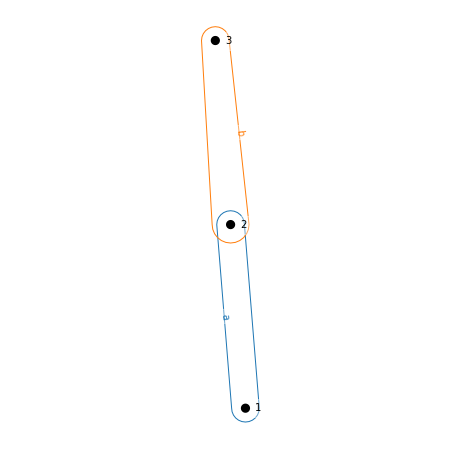

In [87]:
hnx.drawing.rubber_band.draw(H)

In [88]:
entities = []
for articleID in articles_to_commenters:
    entities.append(hnx.Entity(articleID,articles_to_commenters[articleID]))
    
E = hnx.EntitySet('articles_commenters',elements=entities)
H = hnx.Hypergraph(E)

In [ ]:
hnx.drawing.rubber_band.draw(H)